## Word Vectors
One Hot Encoding and Word Embedding are two of the most popular concept for vector representation in Natural Language Processing. In this notebook, we are going to implement word embeding concept using python.

## Imports

In [1]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [2]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [3]:
gensim.__version__

'4.3.2'

In [4]:
np.random.seed(42)

**Use Pretrained Word Vectors**

In [6]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [29]:
wv = api.load('glove-twitter-200')

[==================================================] 100.0% 758.5/758.5MB downloaded


In [30]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [31]:
king_wv = wv["king"]

In [32]:
print(king_wv.shape)
print(king_wv)

(200,)
[-3.1949e-01  1.0382e-01  2.4294e-01 -3.4845e-01 -2.3829e-01 -3.7200e-01
  3.7950e-01 -3.0334e-01 -2.1441e-01 -4.9230e-01  9.8965e-02 -1.3791e-01
 -8.0118e-01  5.0410e-02  3.9894e-02  8.7262e-01  4.4222e-01 -3.2196e-01
  6.5187e-01  1.1450e-01 -3.0635e-01  1.3293e-01 -6.8867e-03 -1.5688e-01
  1.9338e-01 -2.8577e-01  2.6790e-01  2.4383e-01  1.5909e-02  7.6273e-02
  5.8036e-01 -7.1514e-02  2.0632e-01 -3.0900e-01  3.0187e-01  1.2900e-01
 -1.4297e-01 -7.9204e-02  2.5754e-01 -5.9380e-01 -1.2120e-03  3.0647e-01
  8.3300e-01 -5.4968e-02  1.3717e-01 -1.1724e-01  2.8900e-01  2.3425e-01
  3.5452e-01  1.3312e-01 -1.4014e-01 -1.0090e+00  2.1142e-01  5.3368e-01
  1.3168e-01 -1.3271e-01  2.5046e-01  2.8531e-02 -6.4371e-01  5.6957e-02
 -4.9754e-01 -7.1232e-03 -4.0831e-01 -3.9913e-01 -5.9560e-01 -5.8436e-01
  8.5161e-02  3.7481e-01  8.2033e-02 -3.2318e-01  5.3241e-02 -2.1014e-01
 -6.5141e-01 -3.5154e-02  3.4920e-01 -3.9234e-01 -2.4786e-01  3.2653e-01
  2.1577e-01  5.2755e-01  3.1510e-01 -2.2263

**Saving the model**

In [33]:
wv.save('./glove-twitter-200.kv')

**Loading the saved model**

In [34]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load("./glove-twitter-200.kv")

In [35]:
king_wv2 = wv["king"]

In [36]:
print(king_wv2.shape)
print(king_wv2)

(200,)
[-3.1949e-01  1.0382e-01  2.4294e-01 -3.4845e-01 -2.3829e-01 -3.7200e-01
  3.7950e-01 -3.0334e-01 -2.1441e-01 -4.9230e-01  9.8965e-02 -1.3791e-01
 -8.0118e-01  5.0410e-02  3.9894e-02  8.7262e-01  4.4222e-01 -3.2196e-01
  6.5187e-01  1.1450e-01 -3.0635e-01  1.3293e-01 -6.8867e-03 -1.5688e-01
  1.9338e-01 -2.8577e-01  2.6790e-01  2.4383e-01  1.5909e-02  7.6273e-02
  5.8036e-01 -7.1514e-02  2.0632e-01 -3.0900e-01  3.0187e-01  1.2900e-01
 -1.4297e-01 -7.9204e-02  2.5754e-01 -5.9380e-01 -1.2120e-03  3.0647e-01
  8.3300e-01 -5.4968e-02  1.3717e-01 -1.1724e-01  2.8900e-01  2.3425e-01
  3.5452e-01  1.3312e-01 -1.4014e-01 -1.0090e+00  2.1142e-01  5.3368e-01
  1.3168e-01 -1.3271e-01  2.5046e-01  2.8531e-02 -6.4371e-01  5.6957e-02
 -4.9754e-01 -7.1232e-03 -4.0831e-01 -3.9913e-01 -5.9560e-01 -5.8436e-01
  8.5161e-02  3.7481e-01  8.2033e-02 -3.2318e-01  5.3241e-02 -2.1014e-01
 -6.5141e-01 -3.5154e-02  3.4920e-01 -3.9234e-01 -2.4786e-01  3.2653e-01
  2.1577e-01  5.2755e-01  3.1510e-01 -2.2263

In [37]:
np.allclose(king_wv, king_wv2)

True

In [38]:
wv.similarity("apple", "mango")

0.4747994

In [39]:
wv.similarity("apple", "car")

0.37038416

In [40]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.40
'car'	'bicycle'	0.47
'car'	'airplane'	0.46
'car'	'cereal'	0.27
'car'	'communism'	0.06


In [41]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('truck', 0.7350814938545227), ('cars', 0.6960885524749756), ('driving', 0.6913292407989502), ('suv', 0.676577091217041), ('drove', 0.6688255667686462)]


In [42]:
print(wv.doesnt_match(['car', 'suv', 'truck', 'power']))

power


**Semantic regularities captured in word embeddings**

In [43]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.6820898652076721),
 ('prince', 0.5875527858734131),
 ('princess', 0.5620488524436951)]

In [45]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('girl', 0.7306562662124634),
 ('queen', 0.7207666635513306),
 ('that', 0.7187841534614563)]

In [46]:
words = ["one", "two", "male", "female", "tiger", "boat", "ship"]

In [47]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 1.9370046e-01,  3.3461633e+00],
       [-6.8893260e-04,  3.3673141e+00],
       [ 4.3337169e+00, -1.9937937e+00],
       [ 3.4650054e+00, -1.0986946e+00],
       [-7.7843165e-01, -4.0520594e-01],
       [-3.7816105e+00, -1.2879575e+00],
       [-3.4316931e+00, -1.9278258e+00]], dtype=float32)

### Visualizing these word vectors

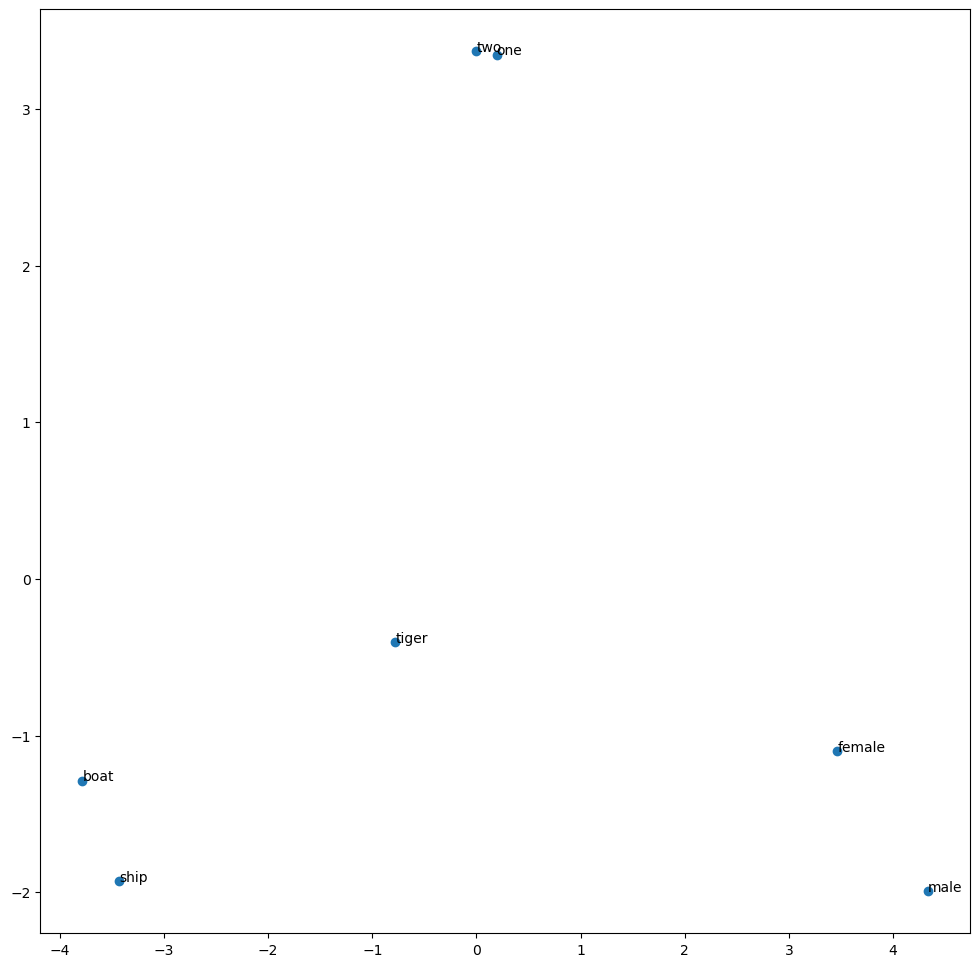

In [48]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

Let's train the logistic regresion  model using word vectors

In [49]:
data = pd.read_csv("toxic_comments.csv", engine="python")
data = data[["comment_text", "toxic"]]
data

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
...,...,...
495,"Sarek of Vulcan: Unfortunately for you, you ca...",0
496,Keep your chin up! Darwinism was not accepted ...,0
497,"""""""Nazi filth"""" is impolite 04:27, 20 Jan 200...",1
498,Interesting. I checked the other case number K...,0


In [50]:
data["toxic"].value_counts()

toxic
0    451
1     49
Name: count, dtype: int64

This dataset is use for only demonstration purpose cause there is a problem of class imbalance.

In [63]:
def sent_vec(sent):
    '''Returns a n dimensional vector
       input: Tokenized Sentence
       output: n dimensional vector
    '''
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr # average
    return wv_res

In [64]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)
    
    # Lemmatizing each token and converting each token into lowercase
    tokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words
    tokens = [ word for word in tokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return tokens

In [65]:
sent_vec("I am a boy")

array([ 6.43690120e-02, -8.53199980e-02, -2.80460846e-02,  1.35600715e-01,
       -6.54114783e-03,  1.97374719e-01, -3.68564855e-01, -3.35985699e-02,
       -3.08471572e-01,  2.09963432e-01, -8.23124159e-02, -2.86060570e-01,
        1.28979998e-01,  1.10579575e-01, -6.67900017e-02, -1.21234289e-01,
       -1.73258931e-01,  1.10158569e-01, -2.95640140e-01,  3.37344285e-01,
       -1.74048564e-02, -6.06401424e-02,  4.84280007e-01, -6.10271269e-03,
        2.59173003e-01, -1.83578284e+00, -1.34709997e-01, -2.22407997e-01,
        3.36728577e-01,  3.42597155e-01, -1.52552711e-01, -1.83926801e-01,
       -8.27694280e-02,  8.05742826e-02,  2.81469684e-01,  2.11611418e-01,
       -9.69838265e-03, -2.28236431e-01, -5.93530004e-01,  1.41075709e-01,
       -8.14394282e-01,  1.90745730e-02,  2.65285709e-01,  7.30499966e-02,
        7.34430083e-02, -1.70661059e-01,  8.28400068e-03, -1.51109998e-01,
        8.90838568e-02,  4.61642134e-02,  1.48132853e-02, -2.31542891e-02,
       -2.75000291e-03,  

In [58]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'everything', 'us', 'beyond', 'quite', 'everyone', 'sometimes', 'first', 'for', 'anyhow', 'within', 'whereafter', 'we', 'became', 'may', 'ever', 'very', 'any', 'less', 'under', 'whole', '‘s', 'otherwise', 'moreover', 'above', 'two', 'alone', 'ours', 'eleven', 'which', 'and', 'does', 'yourselves', 'toward', 'this', 'hereafter', 'up', 'therein', 'with', 'onto', 'just', 'fifty', 'amongst', 'rather', 'else', 'been', 'much', 'even', 'make', 'upon', 'a', 'nothing', 'against', 'an', 'well', 'whatever', 'often', 'perhaps', 'your', 'afterwards', 'thereafter', 'out', 'part', 'she', 'his', 'because', 'ca', 'however', 'myself', 'yet', 'herself', 'another', 'meanwhile', 'anything', 'someone', 'unless', "'ll", 'in', 'was', 'has', 'except', 'please', 'several', 'put', 'really', 'forty', 'three', 'their', 'thereby', 'whenever', 'across', 'only', 'on', 'whoever', 'indeed', 'ourselves', 'twenty', 'me', 'own', 'bottom', 'wherever', 'call', 'hence', '’s', 'such', 'whereby', 'amount', '‘ll', 'four', 'six'

In [59]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [60]:
data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [61]:
data.head()

,comment_text,toxic,tokens
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, edit, username, hardcore, metall..."
1,D'aww! He matches this background colour I'm s...,0,"[d'aww, match, background, colour, seemingly, ..."
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, try, edit, war, guy, constantly, re..."
3,"""\nMore\nI can't make any real suggestions on ...",0,"[real, suggestion, improvement, wonder, sectio..."
4,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]"


In [66]:
data['vec'] = data['tokens'].apply(sent_vec)

In [67]:
data.head()

,comment_text,toxic,tokens,vec
0,Explanation\nWhy the edits made under my usern...,0,"[explanation, edit, username, hardcore, metall...","[0.04585266574507668, 0.021216620912864095, -0..."
1,D'aww! He matches this background colour I'm s...,0,"[d'aww, match, background, colour, seemingly, ...","[0.10238454558632591, -0.018367271531711925, -..."
2,"Hey man, I'm really not trying to edit war. It...",0,"[hey, man, try, edit, war, guy, constantly, re...","[-0.008305295463651418, 0.16614355240017176, -..."
3,"""\nMore\nI can't make any real suggestions on ...",0,"[real, suggestion, improvement, wonder, sectio...","[0.059776159026092145, 0.1538898315189815, -0...."
4,"You, sir, are my hero. Any chance you remember...",0,"[sir, hero, chance, remember, page]","[0.0532560000816981, 0.1469593271613121, -0.23..."


In [68]:
X = data['vec'].to_list()
y = data['toxic'].to_list()

In [71]:
X[0].shape

(200,)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

In [73]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

In [74]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [75]:
from sklearn import metrics
predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.94
Logistic Regression Precision: 1.0
Logistic Regression Recall: 0.4
